# Bernstein-Vazirani Algorithm

## Importing libraries and defining secret number

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secret_num = '100101000'
n = len(secret_num)

## Building the circuit

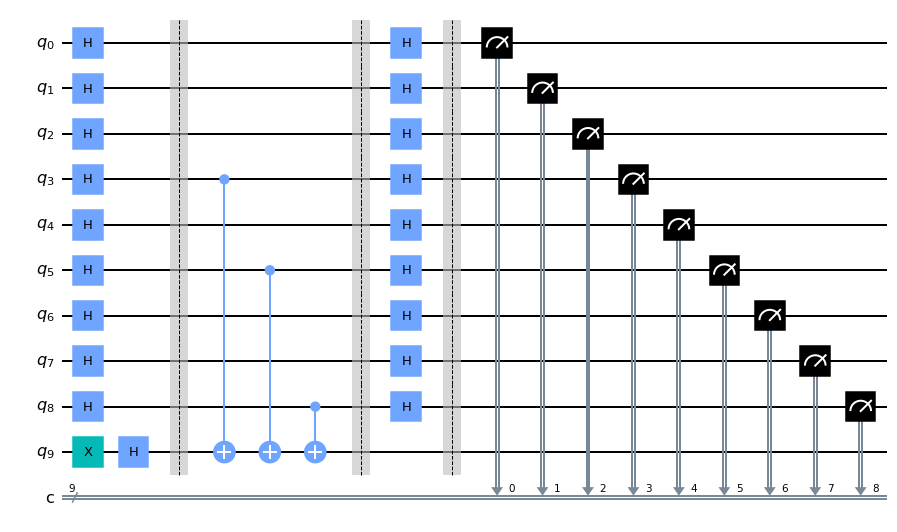

In [3]:
circuit = QuantumCircuit(n + 1, n)
circuit.h(range(n))

circuit.x(n)
circuit.h(n)

circuit.barrier()

rev_secret_num = secret_num[::-1] # cuz we are reading string from right to left
for qubit in range(n):
    if (rev_secret_num[qubit] == '1'):
        circuit.cx(qubit, n)
circuit.barrier()

circuit.h(range(n))
circuit.barrier()

circuit.measure(range(n), range(n))

fig = circuit.draw('mpl')

## Implementation

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'100101000': 1}
